In [1]:
import numpy as np
import pandas as pd

In [2]:
PATH = "data/marketing_data.csv"

df = pd.read_csv(PATH)

df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [3]:
df.shape

(2240, 28)

In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [5]:
df.columns = df.columns.str.strip()

df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [7]:
df['Income'] = df['Income'].str.strip().str.replace('$', '', regex=False).str.replace(',', '', regex=False)

df['Income'] = df['Income'].astype('float')

In [8]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

C:\Users\annam\AppData\Local\Temp\ipykernel_1388\2795487963.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


In [ ]:
1. Univariate Analysis - Statistical Non Visual Analysis

In [9]:
discrete_df = df.select_dtypes(include=['object'])

numerical_df = df.select_dtypes(include=['int64', 'float64'])

In [10]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()

In [11]:
discrete_univariate_analysis(discrete_df)

********** Education **********
count                                            2240
nunique                                             5
unique     [Graduation, PhD, 2n Cycle, Master, Basic]
Name: Education, dtype: object
Value Counts: 
 Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

********** Marital_Status **********
count                                                   2240
nunique                                                    8
unique     [Divorced, Single, Married, Together, Widow, Y...
Name: Marital_Status, dtype: object
Value Counts: 
 Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64

********** Country **********
count                                     2240
nunique                                      8
unique     [SP, CA, US, AUS, GER, IND, SA, ME]
Name: Country,

In [12]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std']))
        print()

In [13]:
numerical_univariate_analysis(numerical_df)

********** ID **********
min           0.000000
max       11191.000000
mean       5592.159821
median     5458.500000
std        3246.662198
Name: ID, dtype: float64

********** Year_Birth **********
min       1893.000000
max       1996.000000
mean      1968.805804
median    1970.000000
std         11.984069
Name: Year_Birth, dtype: float64

********** Income **********
min         1730.000000
max       666666.000000
mean       52247.251354
median     51381.500000
std        25173.076661
Name: Income, dtype: float64

********** Kidhome **********
min       0.000000
max       2.000000
mean      0.444196
median    0.000000
std       0.538398
Name: Kidhome, dtype: float64

********** Teenhome **********
min       0.000000
max       2.000000
mean      0.506250
median    0.000000
std       0.544538
Name: Teenhome, dtype: float64

********** Recency **********
min        0.000000
max       99.000000
mean      49.109375
median    49.000000
std       28.962453
Name: Recency, dtype: float64

***

In [14]:
numerical_df.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain'],
      dtype='object')

In [15]:
discrete_num_cols = ['ID', 'Year_Birth', 'Kidhome', 'Teenhome',
                   'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                   'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
                   'Response', 'Complain']
numerical_df.drop(columns=discrete_num_cols, axis=1, inplace=True)

print('Shape:', numerical_df.shape)
print('Columns:', numerical_df.columns)

Shape: (2240, 8)
Columns: Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
      dtype='object')


In [16]:
discrete_num_df = df[discrete_num_cols]

print('Shape:', discrete_num_df.shape)
print('Columns:', discrete_num_df.columns)

Shape: (2240, 16)
Columns: Index(['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain'],
      dtype='object')


In [17]:
discrete_num_df = discrete_num_df.drop(columns=['ID'], axis=1)

print('Shape:', discrete_num_df.shape)
print('Columns:', list(discrete_num_df.columns))

Shape: (2240, 15)
Columns: ['Year_Birth', 'Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain']


In [18]:
numerical_univariate_analysis(numerical_df)

********** Income **********
min         1730.000000
max       666666.000000
mean       52247.251354
median     51381.500000
std        25173.076661
Name: Income, dtype: float64

********** Recency **********
min        0.000000
max       99.000000
mean      49.109375
median    49.000000
std       28.962453
Name: Recency, dtype: float64

********** MntWines **********
min          0.000000
max       1493.000000
mean       303.935714
median     173.500000
std        336.597393
Name: MntWines, dtype: float64

********** MntFruits **********
min         0.000000
max       199.000000
mean       26.302232
median      8.000000
std        39.773434
Name: MntFruits, dtype: float64

********** MntMeatProducts **********
min          0.000000
max       1725.000000
mean       166.950000
median      67.000000
std        225.715373
Name: MntMeatProducts, dtype: float64

********** MntFishProducts **********
min         0.000000
max       259.000000
mean       37.525446
median     12.000000
std     

In [19]:
discrete_univariate_analysis(discrete_df)

********** Education **********
count                                            2240
nunique                                             5
unique     [Graduation, PhD, 2n Cycle, Master, Basic]
Name: Education, dtype: object
Value Counts: 
 Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

********** Marital_Status **********
count                                                   2240
nunique                                                    8
unique     [Divorced, Single, Married, Together, Widow, Y...
Name: Marital_Status, dtype: object
Value Counts: 
 Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64

********** Country **********
count                                     2240
nunique                                      8
unique     [SP, CA, US, AUS, GER, IND, SA, ME]
Name: Country,

In [20]:
discrete_univariate_analysis(discrete_num_df)

********** Year_Birth **********
count                                                   2240
nunique                                                   59
unique     [1970, 1961, 1958, 1967, 1989, 1954, 1947, 197...
Name: Year_Birth, dtype: object
Value Counts: 
 Year_Birth
1976    89
1971    87
1975    83
1972    79
1970    77
1978    77
1965    74
1973    74
1969    71
1974    69
1956    55
1979    53
1958    53
1952    52
1977    52
1959    51
1968    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1964    42
1983    42
1986    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1947    16
1946    16
1991    15
1992    13
1945     8
1944     7
1943     7
1993     5
1995     5
1994     3
1996     2
1893     1
1899     1
1941     1
1940     1
1900     1
Name: count, dtype: int64

********** Kidhome **********
count           224

In [21]:
df[discrete_num_cols] = df[discrete_num_cols].astype('object')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   object        
 1   Year_Birth           2240 non-null   object        
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   object        
 6   Teenhome             2240 non-null   object        
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [22]:
df.shape

(2240, 28)

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

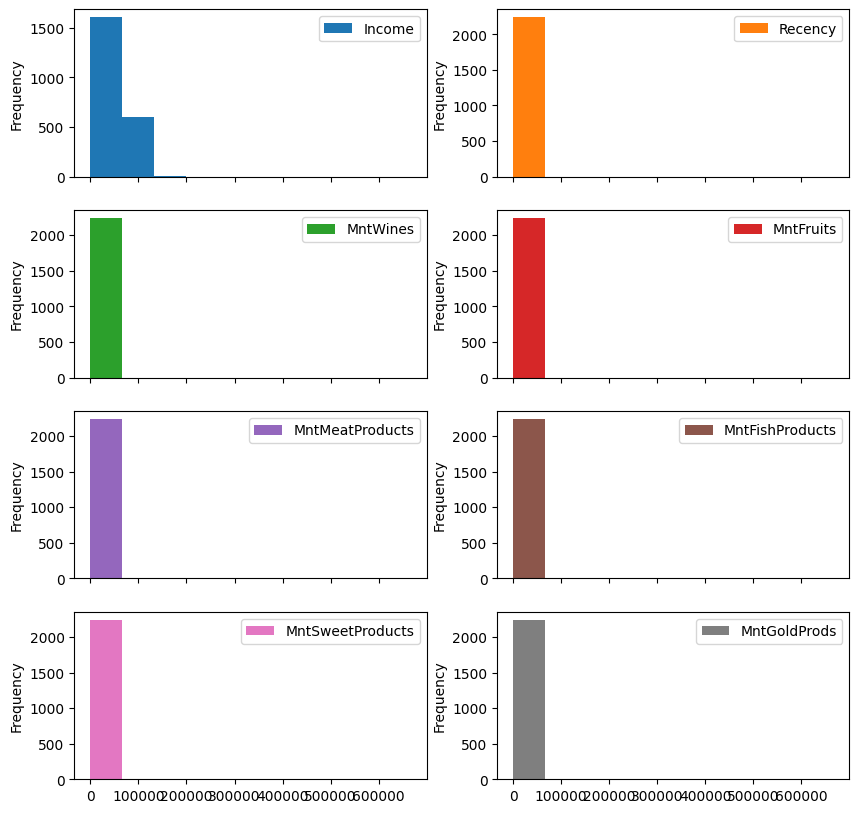

In [23]:
df.plot(kind='hist', subplots=True, layout=(4, 2), figsize=(10, 10))

Income                 Axes(0.125,0.712609;0.352273x0.167391)
Recency             Axes(0.547727,0.712609;0.352273x0.167391)
MntWines               Axes(0.125,0.511739;0.352273x0.167391)
MntFruits           Axes(0.547727,0.511739;0.352273x0.167391)
MntMeatProducts         Axes(0.125,0.31087;0.352273x0.167391)
MntFishProducts      Axes(0.547727,0.31087;0.352273x0.167391)
MntSweetProducts           Axes(0.125,0.11;0.352273x0.167391)
MntGoldProds            Axes(0.547727,0.11;0.352273x0.167391)
dtype: object

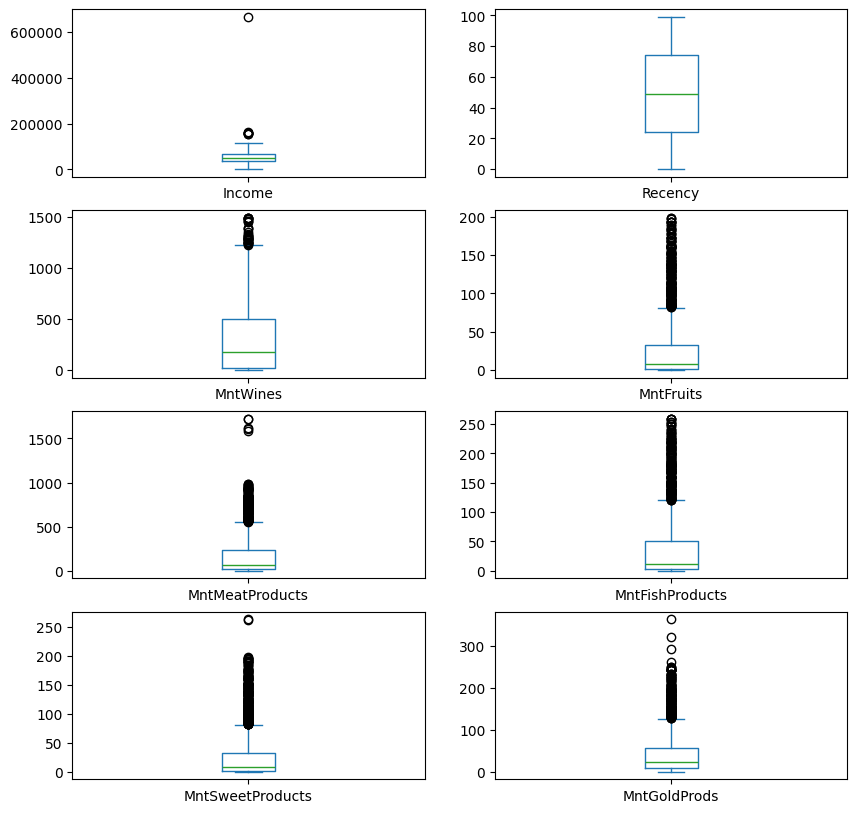

In [24]:
df.plot(kind='box', subplots=True, layout=(4, 2), figsize=(10, 10))

In [25]:
df = df.loc[df['Income'] < 100000]

df.shape

(2203, 28)

In [26]:
df = df.loc[(df['MntMeatProducts'] < 1000)]

df.shape

(2202, 28)

In [27]:
df = df.loc[(df['MntSweetProducts'] < 200)]

df.shape

(2202, 28)

In [28]:
df = df.loc[(df['MntGoldProds'] < 250)]

df.shape

(2199, 28)

In [ ]:
3. Bivariate Analysis

In [29]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

<Axes: xlabel='Income', ylabel='MntWines'>

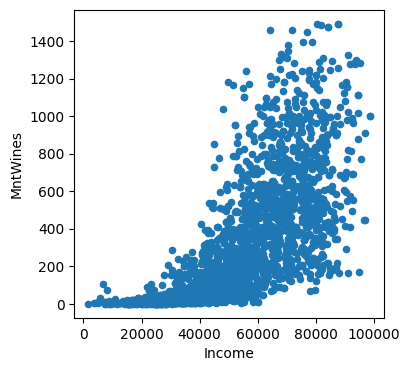

In [30]:
df.plot(kind='scatter', x='Income', y='MntWines', figsize=(4, 4))

<Axes: xlabel='Income', ylabel='MntMeatProducts'>

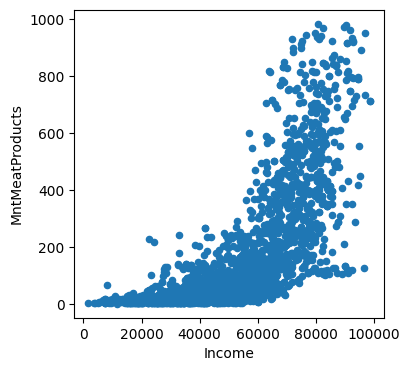

In [31]:
df.plot(kind='scatter', x='Income', y='MntMeatProducts', figsize=(4, 4))

In [32]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [33]:
pd.crosstab(df['Marital_Status'],df['Response'])

Response,0,1
Marital_Status,,
Absurd,1,1
Alone,2,1
Divorced,183,47
Married,754,98
Single,362,105
Together,509,58
Widow,58,18
YOLO,1,1


In [34]:
pd.crosstab(df['Marital_Status'], df['Response'], normalize=True)

Response,0,1
Marital_Status,,
Absurd,0.000455,0.000455
Alone,0.000910,0.000455
Divorced,0.083220,0.021373
Married,0.342883,0.044566
Single,0.164620,0.047749
Together,0.231469,0.026376
Widow,0.026376,0.008186
YOLO,0.000455,0.000455


In [35]:
pd.crosstab(df['Marital_Status'], df['Response'], normalize='index')

Response,0,1
Marital_Status,,
Absurd,0.500000,0.500000
Alone,0.666667,0.333333
Divorced,0.795652,0.204348
Married,0.884977,0.115023
Single,0.775161,0.224839
Together,0.897707,0.102293
Widow,0.763158,0.236842
YOLO,0.500000,0.500000


In [36]:
pd.crosstab(df['Marital_Status'], df['Response'], normalize='index', margins=True)

Response,0,1
Marital_Status,,
Absurd,0.500000,0.500000
Alone,0.666667,0.333333
Divorced,0.795652,0.204348
Married,0.884977,0.115023
Single,0.775161,0.224839
Together,0.897707,0.102293
Widow,0.763158,0.236842
YOLO,0.500000,0.500000
All,0.850387,0.149613


In [37]:
pd.crosstab(df['Marital_Status'], df['Response'], normalize='columns')

Response,0,1
Marital_Status,,
Absurd,0.000535,0.003040
Alone,0.001070,0.003040
Divorced,0.097861,0.142857
Married,0.403209,0.297872
Single,0.193583,0.319149
Together,0.272193,0.176292
Widow,0.031016,0.054711
YOLO,0.000535,0.003040


In [38]:
pd.crosstab(df['Marital_Status'], df['Response'], normalize='columns', margins=True)

Response,0,1,All
Marital_Status,,,
Absurd,0.000535,0.003040,0.000910
Alone,0.001070,0.003040,0.001364
Divorced,0.097861,0.142857,0.104593
Married,0.403209,0.297872,0.387449
Single,0.193583,0.319149,0.212369
Together,0.272193,0.176292,0.257844
Widow,0.031016,0.054711,0.034561
YOLO,0.000535,0.003040,0.000910


<Axes: xlabel='Marital_Status'>

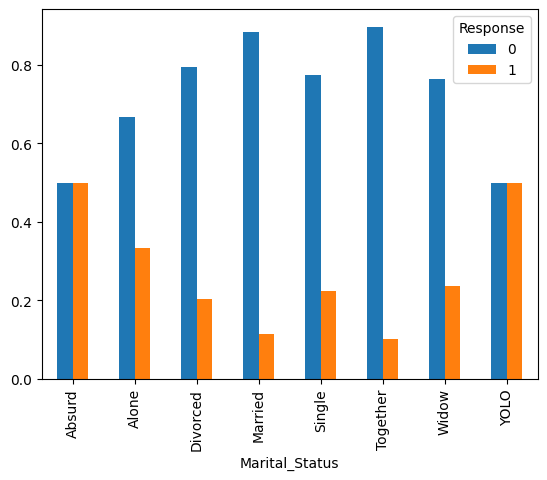

In [39]:
tab = pd.crosstab(df['Marital_Status'], df['Response'], normalize='index')

tab.plot(kind='bar')

<Axes: ylabel='Marital_Status'>

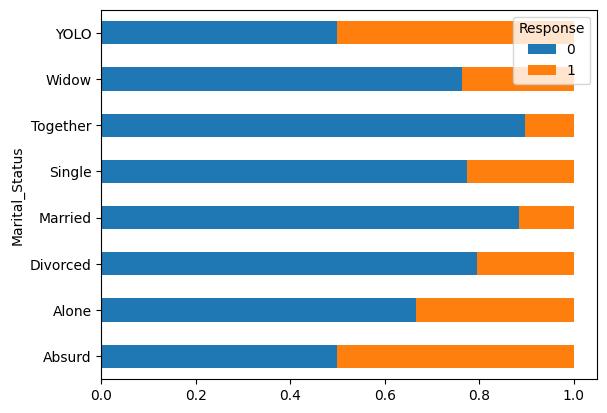

In [40]:
tab.plot(kind='barh', stacked=True)

In [41]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2199 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2199 non-null   object        
 1   Year_Birth           2199 non-null   object        
 2   Education            2199 non-null   object        
 3   Marital_Status       2199 non-null   object        
 4   Income               2199 non-null   float64       
 5   Kidhome              2199 non-null   object        
 6   Teenhome             2199 non-null   object        
 7   Dt_Customer          2199 non-null   datetime64[ns]
 8   Recency              2199 non-null   int64         
 9   MntWines             2199 non-null   int64         
 10  MntFruits            2199 non-null   int64         
 11  MntMeatProducts      2199 non-null   int64         
 12  MntFishProducts      2199 non-null   int64         
 13  MntSweetProducts     2199 non-null   i

In [43]:
group = df.groupby('Marital_Status')

group['Income'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
Marital_Status,,,,
Absurd,65487.0,79244.0,72365.500000,72365.5
Alone,34176.0,61331.0,43789.000000,35860.0
Divorced,1730.0,90687.0,52177.934783,52183.0
Married,4023.0,96547.0,51462.983568,51763.5
Single,3502.0,98777.0,50940.903640,48904.0
Together,5648.0,96876.0,51425.252205,51195.0
Widow,22123.0,85620.0,56481.552632,56551.0
YOLO,48432.0,48432.0,48432.000000,48432.0


<Axes: title={'center': 'Income'}, xlabel='Marital_Status'>

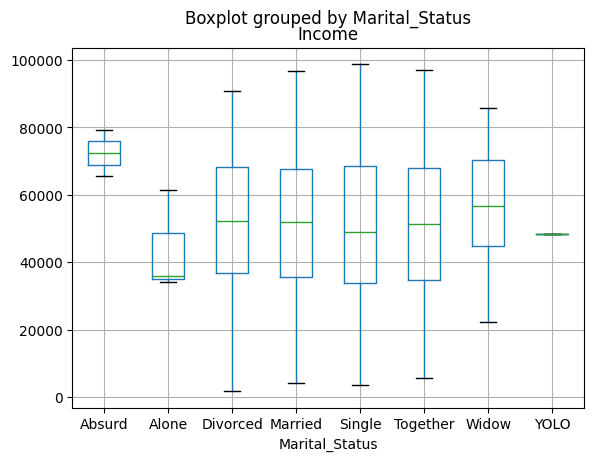

In [44]:
df.boxplot(by='Marital_Status', column='Income')